In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Dataset prep for Task 1

In [5]:
# gretz Dataset

gretz = pd.read_csv("gretz/arg_quality_rank_30k.csv", usecols=["argument", "topic", "set", "WA"])
gretz.rename(columns={"WA": "rank"}, inplace=True)

# save gretz for future reference
gretz.to_csv("gretz/gretz_complete_set.csv", sep=",", columns=["rank", "argument","topic"], index=False)

# split into the train-dev-test sets
train_gretz = gretz[gretz["set"] == "train"]
dev_gretz = gretz[gretz["set"] == "dev"]
test_gretz = gretz[gretz["set"] == "test"]

print(len(train_gretz))
print(len(dev_gretz))
print(len(test_gretz))

# prepare tab separated files that contain arg and WA scores

train_gretz.to_csv("gretz/gretz_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
dev_gretz.to_csv("gretz/gretz_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
test_gretz.to_csv("gretz/gretz_test.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

# prepare gretz test set for toledo model but remove common topics
test_gretz_without_common_topics = test_gretz.loc[~test_gretz["topic"].isin(["Social media brings more harm than good"])]
test_gretz_without_common_topics.to_csv("gretz/gretz_test_no_common_topics.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

20974
3208
6315


In [6]:
# toledo Dataset

filenames = glob.glob("toledo/IBM-ArgQ-5.3kArgs/*.tsv")

complete_toledo = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filename, sep="\t", engine='python')
    data["topic"] = filename[25:-4]
    complete_toledo.append(data)

comp_toledo = pd.concat(complete_toledo)
comp_toledo.reset_index(inplace=True, drop=True)

# save the complete set for future reference
comp_toledo.to_csv("toledo/toledo_complete_set.csv", sep=",", columns=["rank", "argument","topic"], index=False)

# prepare train, dev and test sets.

toledo_test = comp_toledo.loc[comp_toledo["topic"].isin(["Flu-vaccination-should-be-mandatory-(PRO)", "Flu-vaccination-should-not-be-mandatory-(CON)"])].reset_index(drop=True)
toledo_training = comp_toledo.loc[~comp_toledo["topic"].isin(["Flu-vaccination-should-be-mandatory-(PRO)", "Flu-vaccination-should-not-be-mandatory-(CON)"])].reset_index(drop=True)

toledo_train, toledo_dev = train_test_split(toledo_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(toledo_train))
print(len(toledo_dev))
print(len(toledo_test))

toledo_train.to_csv("toledo/toledo_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
toledo_dev.to_csv("toledo/toledo_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
toledo_test.to_csv("toledo/toledo_test.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)


4812
254
232


In [7]:
# swanson 

filenames = glob.glob("swanson/*means.csv")

complete_swanson = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filenames[i], usecols=['GoodSliderMean', 'Phrase.x'], engine='python')
    data["topic"] = filename[8:-17]
    complete_swanson.append(data)

comp_swanson = pd.concat(complete_swanson)
comp_swanson.reset_index(inplace=True, drop=True)
comp_swanson.rename(columns={"GoodSliderMean": "rank", "Phrase.x": "argument"}, inplace=True)

# save comp_swanson for future reference
comp_swanson.to_csv("swanson/swanson_complete_set.csv", sep=",", columns=["rank", "argument", "topic"], index=False)

swanson_test = comp_swanson.loc[comp_swanson["topic"] == "gc" ].reset_index(drop=True)
swanson_training = comp_swanson[comp_swanson["topic"] != "gc"].reset_index(drop=True)

swanson_train, swanson_dev = train_test_split(swanson_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(swanson_train))
print(len(swanson_dev))
print(len(swanson_test))

swanson_train.to_csv("swanson/swanson_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
swanson_dev.to_csv("swanson/swanson_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
swanson_test.to_csv("swanson/swanson_test.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

3595
190
1590


In [2]:
# ukprank

filenames = glob.glob("habb/data/UKPConvArg1-Ranking-CSV/*.csv")
complete_ukprank = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filename, sep="\t")
    data["topic"] = filename[34:-4]
    complete_ukprank.append(data)
    
comp_ukprank = pd.concat(complete_ukprank)
comp_ukprank.reset_index(inplace=True, drop=True)
comp_ukprank["rank_rev"] = 1 - comp_ukprank["rank"] 
comp_ukprank["rank_norm"] = (comp_ukprank["rank_rev"] - comp_ukprank["rank_rev"].min())/(comp_ukprank["rank_rev"].max() - comp_ukprank["rank_rev"].min())
comp_ukprank.rename(columns={"#id": "id", "rank": "old_rank", "rank_norm": "rank"}, inplace=True)

# save comp_ukprank for future reference
comp_ukprank.to_csv("habb/ukprank_complete_set.csv", sep=",", columns=["rank", "argument", "topic"], index=False)


ukprank_test = comp_ukprank.loc[comp_ukprank["topic"].isin(["ban-plastic-water-bottles_no-bad-for-the-economy", "ban-plastic-water-bottles_yes-emergencies-only"])].reset_index(drop=True)
ukprank_training = comp_ukprank.loc[~comp_ukprank["topic"].isin(["ban-plastic-water-bottles_no-bad-for-the-economy", "ban-plastic-water-bottles_yes-emergencies-only"])].reset_index(drop=True)

ukprank_train, ukprank_dev = train_test_split(ukprank_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(ukprank_train))
print(len(ukprank_dev))
print(len(ukprank_test))

ukprank_train.to_csv("habb/ukprank_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
ukprank_dev.to_csv("habb/ukprank_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
ukprank_test.to_csv("habb/ukprank_test.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)


942
50
60


### Dataset Prep for Task 2:

In [3]:
loo_gretz_path = "loo_gretz"
loo_ibm_path = "loo_ibm"
loo_ukp_path = "loo_ukp"
loo_swanson_path = "loo_swanson"

In [4]:
gretz = pd.read_csv("gretz/gretz_complete_set.csv", sep=",")
toledo = pd.read_csv("toledo/toledo_complete_set.csv", sep=",")
swanson = pd.read_csv("swanson/swanson_complete_set.csv", sep=",")
ukprank = pd.read_csv("habb/ukprank_complete_set.csv", sep=",")

In [8]:
# leave gretz out
frames = [swanson_train, swanson_dev, toledo_train, toledo_dev, ukprank_train, ukprank_dev]
loo_gretz_training = pd.concat(frames,join='inner', ignore_index=True)

loo_gretz_train, loo_gretz_dev = train_test_split(loo_gretz_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(loo_gretz_train))
print(len(loo_gretz_dev))

loo_gretz_train.to_csv("loo_gretz_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
loo_gretz_dev.to_csv("loo_gretz_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

9350
493


In [9]:
# leave toledo out
frames = [swanson_train, swanson_dev, train_gretz, dev_gretz, ukprank_train, ukprank_dev]
loo_toledo_training = pd.concat(frames,join='inner', ignore_index=True)

loo_toledo_train, loo_toledo_dev = train_test_split(loo_toledo_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(loo_toledo_train))
print(len(loo_toledo_dev))

loo_toledo_train.to_csv("loo_toledo_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
loo_toledo_dev.to_csv("loo_toledo_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

27511
1448


In [10]:
# remove common topics from gretz datasets

gretz_train_no_common_topics = train_gretz.loc[~train_gretz["topic"].isin(['Social media brings more harm than good', 'We should stop the development of autonomous cars'])]
gretz_dev_no_common_topics = dev_gretz.loc[~dev_gretz["topic"].isin(['Social media brings more harm than good', 'We should stop the development of autonomous cars'])]

In [11]:
# leave swanson out
frames = [toledo_train, toledo_dev, gretz_train_no_common_topics, gretz_dev_no_common_topics, ukprank_train, ukprank_dev]
loo_swanson_training = pd.concat(frames,join='inner', ignore_index=True)

loo_swanson_train, loo_swanson_dev = train_test_split(loo_swanson_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(loo_swanson_train))
print(len(loo_swanson_dev))

loo_swanson_train.to_csv("loo_swanson_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
loo_swanson_dev.to_csv("loo_swanson_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

28304
1490


In [12]:
# leave ukprank out

frames = [toledo_train, toledo_dev, gretz_train_no_common_topics, gretz_dev_no_common_topics, swanson_train, swanson_dev]
loo_ukprank_training = pd.concat(frames,join='inner', ignore_index=True)

loo_ukprank_train, loo_ukprank_dev = train_test_split(loo_ukprank_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(loo_ukprank_train))
print(len(loo_ukprank_dev))

loo_ukprank_train.to_csv("loo_ukprank_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
loo_ukprank_dev.to_csv("loo_ukprank_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)

30957
1630


### Task 3: All Dataset Training

In [13]:
frames = [toledo_train, toledo_dev, gretz_train_no_common_topics, gretz_dev_no_common_topics, swanson_train, swanson_dev, ukprank_train, ukprank_dev]

task3_training = pd.concat(frames,join='inner', ignore_index=True)

task3_train, task3_dev = train_test_split(task3_training, test_size= 0.05, random_state = 42, shuffle=True)

print(len(task3_train))
print(len(task3_dev))

task3_train.to_csv("task3_train.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)
task3_dev.to_csv("task3_dev.txt", sep="\t", columns=["argument", "rank"], index=False, header=False)


31900
1679


### EDA:

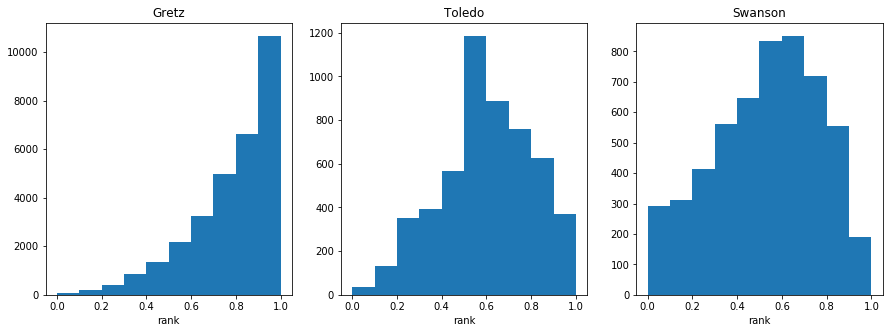

In [192]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

axes[0].hist(gretz["rank"])
axes[0].set_title("Gretz")
axes[0].set_xlabel("rank")
axes[1].hist(comp_toledo["rank"])
axes[1].set_title("Toledo")
axes[1].set_xlabel("rank")
axes[2].hist(comp_swanson["rank"])
axes[2].set_title("Swanson")
axes[2].set_xlabel("rank")
plt.show()

In [195]:
comp_ukprank["rank_rev"] = 1 - comp_ukprank["rank"] 
comp_ukprank["rank_norm"] = (comp_ukprank["rank_rev"] - comp_ukprank["rank_rev"].min())/(comp_ukprank["rank_rev"].max() - comp_ukprank["rank_rev"].min())

In [197]:
# percentile linearization
size = len(comp_ukprank) - 1
helpful_percentile_linearization = comp_ukprank["rank"].rank(method='min').apply(lambda x: (x-1)/size)
print(helpful_percentile_linearization.describe())

count    1052.000000
mean        0.499726
std         0.289301
min         0.000000
25%         0.249286
50%         0.499049
75%         0.750000
max         1.000000
Name: rank, dtype: float64


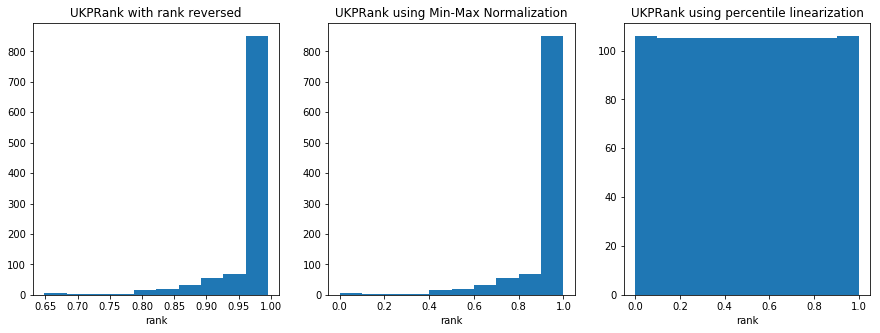

In [194]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

axes[0].hist(comp_ukprank["rank_rev"])
axes[0].set_title("UKPRank with rank reversed")
axes[0].set_xlabel("rank")
axes[1].hist(comp_ukprank["rank_norm"])
axes[1].set_title("UKPRank using Min-Max Normalization")
axes[1].set_xlabel("rank")
axes[2].hist(helpful_percentile_linearization)
axes[2].set_title("UKPRank using percentile linearization")
axes[2].set_xlabel("rank")
plt.show()


In [ ]:
'''
- normalize UKPRank. 
- repeat the task related to ukp.

- multi task learning model: two datasets (Gretz + UKPRank AM dataset) : two different heads: regression and classification.
... batch learning ~ compare with the papers
'''

### Task 4:

In [12]:
# prepare the four datafiles with filenames as the dataset name and contains four columns: id, sentence, label, mode

gretz_train = pd.read_csv("gretz/gretz_train.txt", sep="\t", names=["argument", "label"])
gretz_dev = pd.read_csv("gretz/gretz_dev.txt", sep="\t", names=["argument", "label"])
gretz_test = pd.read_csv("gretz/gretz_test_no_common_topics.txt", sep="\t", names=["argument", "label"])

toledo_train = pd.read_csv("toledo/toledo_train.txt", sep="\t", names=["argument", "label"])
toledo_dev = pd.read_csv("toledo/toledo_dev.txt", sep="\t", names=["argument", "label"])
toledo_test = pd.read_csv("toledo/toledo_test.txt", sep="\t", names=["argument", "label"])

swanson_train = pd.read_csv("swanson/swanson_train.txt", sep="\t", names=["argument", "label"])
swanson_dev = pd.read_csv("swanson/swanson_dev.txt", sep="\t", names=["argument", "label"])
swanson_test = pd.read_csv("swanson/swanson_test.txt", sep="\t", names=["argument", "label"])

ukp_train = pd.read_csv("habb/ukprank_train.txt", sep="\t", names=["argument", "label"])
ukp_dev = pd.read_csv("habb/ukprank_dev.txt", sep="\t", names=["argument", "label"])
ukp_test = pd.read_csv("habb/ukprank_test.txt", sep="\t", names=["argument", "label"])

In [26]:
gretz_train["set"] = "train"
gretz_dev["set"] = "dev"
gretz_test["set"] = "test"

gretz = pd.concat([gretz_train, gretz_dev, gretz_test])
gretz.reset_index(inplace=True, drop=True)
gretz.to_csv("task4/gretz.csv", columns=["argument", "label", "set"], header=True, index=True, index_label="id")

toledo_train["set"] = "train"
toledo_dev["set"] = "dev"
toledo_test["set"] = "test"
toledo = pd.concat([toledo_train, toledo_dev, toledo_test])
toledo.reset_index(inplace=True, drop=True)

toledo.to_csv("task4/toledo.csv", columns=["argument", "label", "set"], header=True, index=True, index_label="id")

swanson_train["set"] = "train"
swanson_dev["set"] = "dev"
swanson_test["set"] = "test"
swanson = pd.concat([swanson_train, swanson_dev, swanson_test])
swanson.reset_index(inplace=True, drop=True)

swanson.to_csv("task4/swanson.csv", columns=["argument", "label", "set"], header=True, index=True, index_label="id")

ukp_train["set"] = "train"
ukp_dev["set"] = "dev"
ukp_test["set"] = "test"
ukp = pd.concat([ukp_train, ukp_dev, ukp_test])
ukp.reset_index(inplace=True, drop=True)

ukp.to_csv("task4/ukp.csv", columns=["argument", "label", "set"], header=True, index=True, index_label="id")